In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
sys.path.append('D:\API\cocoapi\PythonAPI')  # 你下载的 cocoapi 所在路径
import skimage.io as io
from pycocotools.coco import COCO   # 载入 cocoz
%matplotlib inline
CLASS=['tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad']
#CLASS={'tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad'}
class_to_ind = dict(zip(CLASS, range(len(CLASS))))
print(class_to_ind)
coco=COCO("./data/rscup/annotation/annos_rscup_val.json")

{'tennis-court': 0, 'container-crane': 1, 'storage-tank': 2, 'baseball-diamond': 3, 'plane': 4, 'ground-track-field': 5, 'helicopter': 6, 'airport': 7, 'harbor': 8, 'ship': 9, 'large-vehicle': 10, 'swimming-pool': 11, 'soccer-ball-field': 12, 'roundabout': 13, 'basketball-court': 14, 'bridge': 15, 'small-vehicle': 16, 'helipad': 17}
loading annotations into memory...
Done (t=1.65s)
creating index...
index created!


[16]
{'license': 1, 'file_name': 'P4151_1_5824.0_2080.0_part84.jpg', 'coco_url': 'xxx', 'height': 511.0, 'width': 511.0, 'date_captured': '2019-06-25', 'flickr_url': 'xxx', 'id': 282}
3


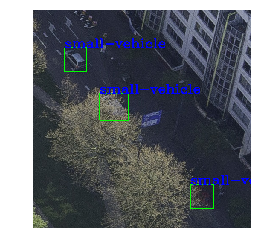

In [12]:
# get all images containing given categories, select one at random
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
sys.path.append('D:\API\cocoapi\PythonAPI')  # 你下载的 cocoapi 所在路径
import skimage.io as io
from pycocotools.coco import COCO   # 载入 cocoz
%matplotlib inline
CLASS=['tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad']
#CLASS={'tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad'}
class_to_ind = dict(zip(CLASS, range(len(CLASS))))
print(class_to_ind)
coco=COCO("./data/rscup/annotation/annos_rscup_val.json")
catIds = coco.getCatIds(catNms=['small-vehicle'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
# imgIds = coco.getImgIds(imgIds=[335328])
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
I = io.imread('./data/rscup/val/'+img['file_name'])
plt.imshow(I)
plt.axis('off')
print(img)
annIds = coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
print(len(annIds))
anns = coco.loadAnns(annIds)
for ann in anns:
    bbox = ann['bbox']
    x = [int(x) for x in bbox]
    cv2.rectangle(I, (x[0],x[1]), (x[0]+x[2],x[1]+x[3]), (0,255,0), 2)
    cv2.putText(I, CLASS[ann['category_id']], (x[0],x[1]), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
plt.imshow(I)
#coco.showAnns(anns)

In [2]:
from mmdet.datasets import augmentations as aug

In [3]:
rotate = aug.RandomRotate(degrees=50)


(3, 4)
(3, 4)
(3, 2, 2)
[[115.82635779 109.56046346]
 [158.54144482 164.92256059]]
[[168.84108452 234.07051031]
 [227.8122136  298.59494276]]
[[326.97049235 490.14311472]
 [372.36482522 547.65700156]]


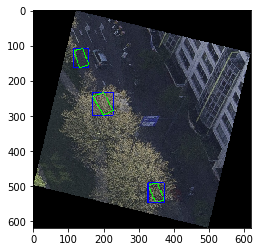

In [31]:
annIds = coco.getAnnIds(imgIds=[282], iscrowd=None)
anns = coco.loadAnns(annIds)
img = coco.loadImgs(282)[0]
I = io.imread('./data/rscup/val/'+img['file_name'])
boxes = []
polys = []
labels = []
for ann in anns:
    boxes.append(ann['bbox'])
    polys.append(ann['segmentation'])
    labels.append(ann['category_id'])
boxes = np.array(boxes)
print(boxes.shape)
boxes[:, 2] += boxes[:, 0]
boxes[:, 3] += boxes[:, 1]
print(boxes.shape)
boxes = np.reshape(boxes, (-1, 2,2))
print(boxes.shape)
polys = np.array(polys)
polys = np.squeeze(polys)
polys = np.resize(polys, (3, 4, 2))
I, polys, boxes, labels = rotate(I, polys, boxes, labels)
for poly, box in zip(polys, boxes):
    print(box)
    cv2.polylines(I, np.array(polys, np.int32), 1,(0,255,0), 2)
    cv2.rectangle(I, (int(box[0][0]),int(box[0][1])), (int(box[1][0]),int(box[1][1])), (0,0,255), 2)
plt.imshow(I)

In [15]:
def _parse_ann_info(ann_info, with_mask=True):
    """Parse bbox and mask annotation.
    Args:
        ann_info (list[dict]): Annotation info of an image.
        with_mask (bool): Whether to parse mask annotations.
    Returns:
        dict: A dict containing the following keys: bboxes, bboxes_ignore,
            labels, masks, mask_polys, poly_lens.
    """
    gt_bboxes = []
    gt_labels = []
    gt_bboxes_ignore = []
    # Two formats are provided.
    # 1. mask: a binary map of the same size of the image.
    # 2. polys: each mask consists of one or several polys, each poly is a
    # list of float.
    if with_mask:
        gt_masks = []
        gt_mask_polys = []
        gt_poly_lens = []
    for i, ann in enumerate(ann_info):
        if ann.get('ignore', False):
            continue
        x1, y1, w, h = ann['bbox']
        if ann['area'] <= 0 or w < 1 or h < 1:
            continue
        bbox = [x1, y1, x1 + w - 1, y1 + h - 1]
        if ann['iscrowd']:
            gt_bboxes_ignore.append(bbox)
        else:
            gt_bboxes.append(bbox)
            gt_labels.append(ann['category_id']-1)
        if with_mask:
            gt_masks.append(coco.annToMask(ann))
            mask_polys = [
                p for p in ann['segmentation'] if len(p) >= 6
            ]  # valid polygons have >= 3 points (6 coordinates)
            poly_lens = [len(p) for p in mask_polys]
            gt_mask_polys.append(mask_polys)
            gt_poly_lens.extend(poly_lens)
    if gt_bboxes:
        gt_bboxes = np.array(gt_bboxes, dtype=np.float32)
        gt_labels = np.array(gt_labels, dtype=np.int64)
    else:
        gt_bboxes = np.zeros((0, 4), dtype=np.float32)
        gt_labels = np.array([], dtype=np.int64)

    if gt_bboxes_ignore:
        gt_bboxes_ignore = np.array(gt_bboxes_ignore, dtype=np.float32)
    else:
        gt_bboxes_ignore = np.zeros((0, 4), dtype=np.float32)

    ann = dict(
        bboxes=gt_bboxes, labels=gt_labels, bboxes_ignore=gt_bboxes_ignore)

    if with_mask:
        ann['masks'] = gt_masks
        # poly format is not used in the current implementation
        ann['mask_polys'] = gt_mask_polys
        ann['poly_lens'] = gt_poly_lens
    return ann

In [16]:
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapOnImage
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug.augmentables.polys import Polygon

In [22]:
import sys
import numpy as np
import cv2
import mmcv
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
sys.path.append('D:\API\cocoapi\PythonAPI')  # 你下载的 cocoapi 所在路径
import skimage.io as io
from pycocotools.coco import COCO   # 载入 cocoz
%matplotlib inline
CLASS=['tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad']
#CLASS={'tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad'}
class_to_ind = dict(zip(CLASS, range(len(CLASS))))
print(class_to_ind)
coco=COCO("./data/rscup/annotation/annos_rscup_train.json")
img_ids = coco.getImgIds()
img_infos = []
for i in img_ids:
    info = coco.loadImgs([i])[0]
    info['filename'] = info['file_name']
    info['height'] = int(info['height'])
    info['width'] = int(info['width'])
    img_infos.append(info)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'tennis-court': 0, 'container-crane': 1, 'storage-tank': 2, 'baseball-diamond': 3, 'plane': 4, 'ground-track-field': 5, 'helicopter': 6, 'airport': 7, 'harbor': 8, 'ship': 9, 'large-vehicle': 10, 'swimming-pool': 11, 'soccer-ball-field': 12, 'roundabout': 13, 'basketball-court': 14, 'bridge': 15, 'small-vehicle': 16, 'helipad': 17}
loading annotations into memory...
Done (t=6.88s)
creating index...
index created!


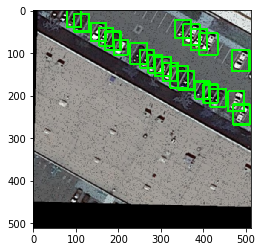

(511, 511, 3)


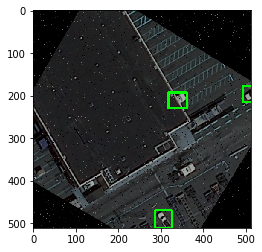

(511, 511, 3)


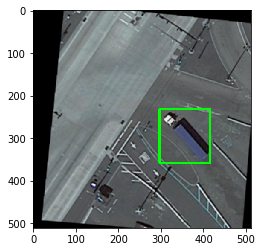

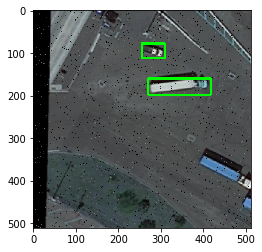

(511, 511, 3)


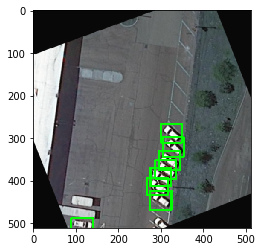

(511, 511, 3)


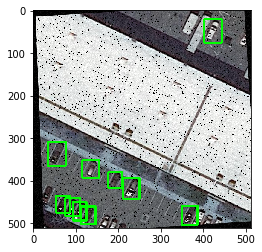

(511, 511, 3)


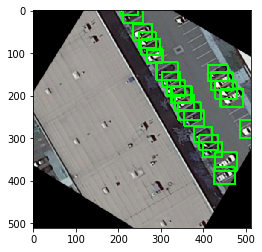

(511, 511, 3)


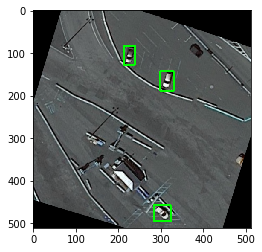

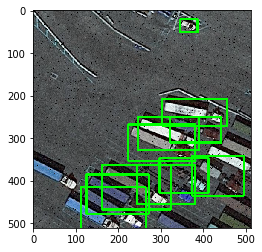

In [175]:
import os
from PIL import Image
import random
def random_rotate(img, polys, masks, degree_range):
    degree = (random.random()*2-1) * degree_range
    polys = np.array(polys).reshape(-1,4,2)
    aug = iaa.Sequential(
    [iaa.Affine(rotate=-degree)])
    np_degree = -degree * np.pi /180
    h, w, _ = img.shape
    rotation_matrix = np.array([[np.cos(np_degree), np.sin(np_degree)],[-np.sin(np_degree), np.cos(np_degree)]])
    polys[:, :, 0] -= w/2
    polys[:, :, 1] -= h/2
    polys = np.dot(polys, rotation_matrix)           
    img = aug.augment_image(img)
    h, w, _ = img.shape
    print(img.shape)
    polys[:, :, 0] += w / 2
    polys[:, :, 1] += h / 2

    xmin = np.min(polys[:, :, 0], axis=1)
    xmax = np.max(polys[:, :, 0], axis=1)
    ymin = np.min(polys[:, :, 1], axis=1)
    ymax = np.max(polys[:, :, 1], axis=1)

    boxes = np.stack(np.array([xmin, ymin, xmax, ymax], np.int32), axis=1)
    boxes = np.reshape(boxes, (-1, 4))
    masks = aug.augment_images(masks)
    return img, boxes, list(masks)

def aug_before_prepare(img, bboxes, masks, polys):
    aug = iaa.SomeOf((1,3),[
        iaa.Multiply(((0.7, 1.3))),
        iaa.GaussianBlur(sigma=(0, 1.5)),
        iaa.ChannelShuffle(1),
        iaa.Pepper(p=0.03),
        iaa.AdditiveGaussianNoise(scale=(0.03*255, 0.05*255)),
        iaa.Dropout(p=(0.03, 0.05)),
        iaa.Salt(p=(0.03, 0.05)),
        iaa.Add((-10,10)),
        iaa.AverageBlur(k=(1,3))
    ])
    if(random.random()>0.5):
        img, bboxes, masks = random_rotate(img, np.array(polys), masks, 90)
    img = aug.augment_image(img)
    return img, bboxes, masks

for idx in range(1,10):
    img_id = img_infos[idx]['id']
    ann_ids = coco.getAnnIds(imgIds=[img_id])
    ann_info = coco.loadAnns(ann_ids)
    ann = _parse_ann_info(ann_info, True)
    img_info = img_infos[idx]
            # load image
    img = mmcv.imread(os.path.join("./data/rscup/train", img_info['filename']))

    img, ann['bboxes'], ann['masks'] = aug_before_prepare(img, ann['bboxes'], ann['masks'], ann["mask_polys"])
    for box in ann['bboxes']:
        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0,255,0), 3)
    plt.imshow(img)
    plt.show()
#     for mask in ann['masks']:
#         plt.imshow(mask)
#         plt.show()